# Statistical Analysis Project

1. Explore data and understand what the fields mean. Data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

2. Examine the relationships between the sales price and other features in the dataset. Use data visualization techniques to help you gain intuitive understanding of the relationships.

3. Make informed guess on which features should be investigated in depth.

4. Data cleaning & manipulation. Apply the following techniques as appropriate:
    * Adjust skewed data distribution.
    * Remove columns with high proportion of missing values.
    * Remove records with missing values.
    * Feature reduction (PCA).
    * Convert categorical data to numerical.


5. Compute field relationship scores with the chosen statistical model.

6. Present your findings in statistical summary and/or data visualizations.

7. Apply iterative data analysis process: set expectations, collect information, react to data/revise expectations

Goal: do an analysis of the dataset and the columns that are most correlated to the price field by using the statistical tools introduced during class.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import linregress 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

import pandas_profiling

### Explore data & perfom data cleaning:

In [2]:
train = pd.read_csv('../train.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Importing a reference file with column names and explanation (to use in case it's difficult to understand 
# what's represented in certain columns):
column_info = pd.read_csv('../column_explanation.csv')
column_info.head()

Column                                   Explanation
0   MSSubClass                            The building class
1     MSZoning             The general zoning classification
2  LotFrontage   Linear feet of street connected to property
3      LotArea                       Lot size in square feet
4       Street                           Type of road access

In [5]:
column_info[column_info['Column']=='FullBath']

Column                  Explanation
48  FullBath   Full bathrooms above grade

In [6]:
train.profile_report(title='Summary of data') 

In [7]:
# Check null values in all of the data columns:
print(train.shape)

null_values = train.isnull().sum()
null_values[null_values>0]

(1460, 81)


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Drop columns with biggest proportion of missing values:
train = train.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1)

### Examine the relationships between the sales price and other features in the dataset. Continue data cleaning.

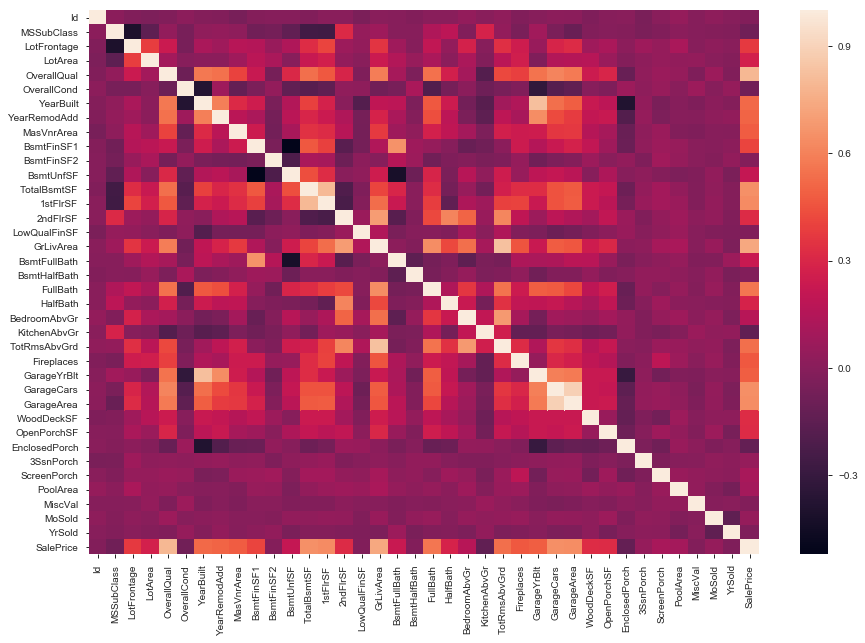

In [25]:
import seaborn as sns

plt.figure(figsize = (15,10))
sns.heatmap(train.corr())

In [9]:
# Most correlated numeric fields to SalesPrice are:
top_corr = train.corr()['SalePrice'].sort_values(ascending=False).head(11)
top_corr[1:]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [10]:
# Check for missing values for the top correlated fields:
train[top_corr.keys()].isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [11]:
train[list(top_corr.keys()[1:])].describe()

OverallQual    GrLivArea   GarageCars   GarageArea  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      6.099315  1515.463699     1.767123   472.980137  1057.429452   
std       1.382997   525.480383     0.747315   213.804841   438.705324   
min       1.000000   334.000000     0.000000     0.000000     0.000000   
25%       5.000000  1129.500000     1.000000   334.500000   795.750000   
50%       6.000000  1464.000000     2.000000   480.000000   991.500000   
75%       7.000000  1776.750000     2.000000   576.000000  1298.250000   
max      10.000000  5642.000000     4.000000  1418.000000  6110.000000   

          1stFlrSF     FullBath  TotRmsAbvGrd    YearBuilt  YearRemodAdd  
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000  
mean   1162.626712     1.565068      6.517808  1971.267808   1984.865753  
std     386.587738     0.550916      1.625393    30.202904     20.645407  
min     334.000000     0.000000      2.000000  1872.000000   1950.000000  
25%     882.000000     1.000000      5.000000  1954.000000   1967.000000  
50%    1087.000000     2.000000      6.000000  1973.000000   1994.000000  
75%    1391.250000     2.000000      7.000000  2000.000000   2004.000000  
max    4692.000000     3.000000     14.000000  2010.000000   2010.000000

Two main measures of central tendency: mean and the median (50th percentile). If they are close in value, it means that the data is symmetrically distributed around the mean. 
If the mean greater than the median, data is right skewed. If the median greater than the mean, the data is left skewed. Example, a very large mean compared to the median means that there are a few outliers that influence the mean and cause the data to be skewed. Need to consider removing them.

GarageCars, GarageArea, TotalBsmtSF and FullBath have 0 values as minimum value. If we check in the profiling table above, we see that there are 0 values in these fields, but what we can deduct is that 0 means that there's no such feature in the current appartment. Meaning that there's no garage, no basement, and for some even no bathroom above grade. So we won't be touching these values. Moreover the highest ratio for 0 values is for GarageCars and GarageArea, which represent 5.5% of total data.

Text(0, 0.5, 'Sale Price')

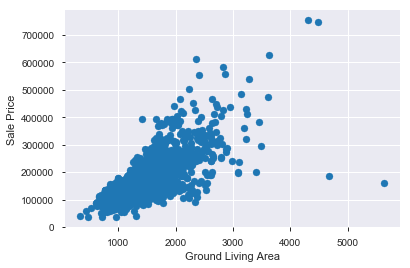

In [12]:
# Plot top correlated fields that seem to have skewed data:
plt.scatter(x = train.GrLivArea, y = train.SalePrice)
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')

We see that there are few outliers with large above ground living area, but low price. We can remove these.

In [13]:
GrLivArea_drop = train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index
train = train.drop(GrLivArea_drop, axis=0)

Text(0, 0.5, 'Sale Price')

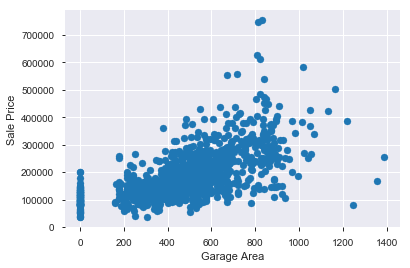

In [14]:
# Plot GarageCars:
plt.scatter(x = train.GarageArea, y = train.SalePrice)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')

There seem to be few outliers that have great Garage Area, but the Sale Price doesn't go up. We will remove these as well.

In [15]:
GrLivArea_drop = train[(train['GarageArea']>1200)&(train['SalePrice']<300000)].index
train = train.drop(GrLivArea_drop, axis=0)

Create categories (bins) for YearBuilt and YearRemodAdd columns:

In [16]:
train.YearBuilt.min(), train.YearBuilt.max()

(1872, 2010)

In [17]:
year_labels = ['>1900', '1900-1950', '1951-1980', '1981-2000', '2000-2010']
cutoffs = [1870, 1899, 1950, 1980, 2000, 2011]
train['YearBuiltBinned'] = pd.cut(train.YearBuilt, cutoffs, labels=year_labels)

In [18]:
train.YearRemodAdd.min(), train.YearRemodAdd.max()

(1950, 2010)

In [19]:
train['YearRemodAddBinned'] = pd.cut(train.YearRemodAdd, cutoffs, labels=year_labels)

### Make informed guess on which categorical features should be investigated in depth. Convert categorical data to numerical.

In [39]:
# newly added bins, replace the numerical fields with these, but by doing the one hot encoding:

train_dummies = pd.get_dummies(data=train, columns=['YearBuiltBinned', 'YearRemodAddBinned'], drop_first=True)
train_dummies.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... SaleCondition SalePrice YearBuiltBinned_1900-1950  \
0    AllPub    Inside  ...        Normal    208500                         0   
1    AllPub       FR2  ...        Normal    181500                         0   
2    AllPub    Inside  ...        Normal    223500                         0   
3    AllPub    Corner  ...       Abnorml    140000                         1   
4    AllPub       FR2  ...        Normal    250000                         0   

  YearBuiltBinned_1951-1980 YearBuiltBinned_1981-2000  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         1   

  YearBuiltBinned_2000-2010  YearRemodAddBinned_1900-1950  \
0                         1                             0   
1                         0                             0   
2                         1                             0   
3                         0                             0   
4                         0                             0   

   YearRemodAddBinned_1951-1980  YearRemodAddBinned_1981-2000  \
0                             0                             0   
1                             1                             0   
2                             0                             0   
3                             1                             0   
4                             0                             1   

   YearRemodAddBinned_2000-2010  
0                             1  
1                             0  
2                             1  
3                             0  
4                             0  

[5 rows x 86 columns]

### Compute field relationship scores with the chosen statistical model.  

Use linear regression & Present your findings in statistical summary and/or data visualizations:

#### Ordinary Least Squares

In [82]:
X = sm.add_constant(train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
                           'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']])

y = train.SalePrice

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
model_OLS = sm.OLS(y_train, X_train)
results = model_OLS.fit()
predict_y = results.predict(X_test) 

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     532.7
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:47:15   Log-Likelihood:                -13787.
No. Observations:                1164   AIC:                         2.760e+04
Df Residuals:                    1153   BIC:                         2.765e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.359e+06   1.28e+05    -10.594   

Rvalue is 0.82, which means that the model captures more than 80% of the data, which is not too bad.

#### Linear Regression

In [71]:
model_LR = linear_model.LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
y_test_pred = model_LR.predict(X_test)

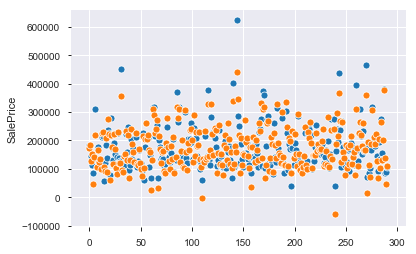

In [91]:
# Plot the results:
sns.scatterplot(range(X_test.shape[0]), y_test)
sns.scatterplot(range(X_test.shape[0]), y_test_pred)

In [73]:
model_LR.score(X_test, y_test)

0.8156034928767346

In [96]:
# LR regression model on train_dummies with encoded columns:

X2 = sm.add_constant(train_dummies[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
                                   'FullBath','TotRmsAbvGrd','YearBuiltBinned_1900-1950', 
                                   'YearBuiltBinned_1951-1980', 'YearBuiltBinned_1981-2000', 
                                   'YearBuiltBinned_2000-2010', 'YearRemodAddBinned_1900-1950', 
                                   'YearRemodAddBinned_1951-1980', 'YearRemodAddBinned_1981-2000', 
                                   'YearRemodAddBinned_2000-2010']])

y2 = train_dummies.SalePrice

In [97]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [98]:
model_LR2 = linear_model.LinearRegression()
model_LR2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
y_test_pred2 = model_LR2.predict(X_test2)

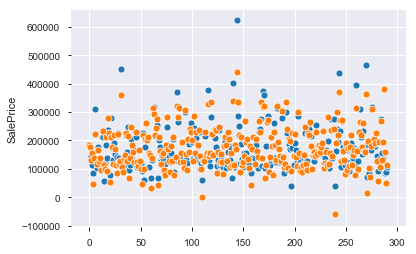

In [100]:
# Plot the results:
sns.scatterplot(range(X_test2.shape[0]), y_test2)
sns.scatterplot(range(X_test2.shape[0]), y_test_pred2)

In [102]:
model_LR2.score(X_test2, y_test2)

0.8182002804460056

In [ ]:
# We see a slightly bit increase in the score, but really minimal, by 0.003 points aproximately